## Working with Llama4 on Together AI

In this notebook we'll take you through common capabilities and uses of the new Llama4 models.

This notebook provides a hands-on guide to using Meta's Llama 4 models, specifically the `meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8` and `meta-llama/Llama-4-Scout-17B-16E-Instruct`, via the Together AI API. We will cover:

*   Setting up the environment.
*   Performing basic chat completions.
*   Handling long context for tasks like repository summarization.
*   Using system prompts for persona-based conversations.
*   Exploring multilingual capabilities.
*   Utilizing multimodal features for image understanding (with Llama 4 Scout).

### Setup

First, let's install the necessary libraries. We need the `together` client library to interact with the Together AI API, and some standard data handling and plotting libraries.

In [ ]:
!pip install -qU together matplotlib numpy pandas seaborn scikit-learn

In [1]:
from together import Together
client = Together()

completion = client.chat.completions.create(
  model="meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8",
  messages=[{"role": "user", "content": "What year was the Golden Gate bridge construction completed in?"}],
)

print(completion.choices[0].message.content)

The Golden Gate Bridge construction was completed in 1937. The bridge was opened to vehicular traffic on May 28, 1937, and to pedestrian traffic on May 27, 1937, with an "Opening Day" pedestrian celebration that drew over 200,000 people.


### Long Context: Summarizing a GitHub Repository

Below we will get the model to ingest all information from a github repo and generate a getting started guide.

Llama 4 Maverick and Scout both support a max context length of `1,048,576` on Together AI.

In [2]:
import os

#Read in our example file
def read_file_to_string(file_path):
    try:
        with open(file_path, "r") as file:
            content = file.read()
            return content
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return "File_Path_Error"

### Ingesting a Repo

We are instructing Llama4 Maverick to write a getting started guide on it. In the next cell we copy paste the same output for readability.

In [3]:
file_content = read_file_to_string("datasets/facebookresearch-imagebind.txt")

PROMPT = f"""You are a helpful assisstant and you excel at summarizing and converting entire code repo's and writing a getting started guides on it.

This getting started is aimed to be an overview for devlopers on how to get started with the new repo, make it friendly and useful with good code examples and references.
ONLY START YOUR GUIDE DIRECTLY, REMEMBER BE DEVELOPER FRIENDLY FOR GETTING STARTED WITH THE REPO: \n\n\n{file_content} """

In [4]:
print("Showing long content")
if len(file_content) > 100:
    print(file_content[:100])
else:
    print(file_content)

Showing long content
Directory structure:
└── facebookresearch-imagebind/
    ├── README.md
    ├── CODE_OF_CONDUCT.md
  


In [5]:
completion = client.chat.completions.create(
  model="meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8",
  messages=[{"role": "user", "content": PROMPT}],
  temperature=1,
  top_p=0.95,
  max_tokens=16000
)

print(completion.choices[0].message.content[:500])

## Getting Started with ImageBind

### Overview
ImageBind is a PyTorch implementation of a multimodal joint embedding model that can bind six different modalities - images, text, audio, depth, thermal, and IMU data. This guide will help you get started with using ImageBind for your research purposes.

### Installation
To install ImageBind, follow these steps:

1. Create a new conda environment with Python 3.10:
```bash
conda create --name imagebind python=3.10 -y
```
2. Activate the environment:


Model output:

## Getting Started with ImageBind

ImageBind is a multimodal joint embedding model developed by Meta AI that learns a joint embedding across six different modalities: images, text, audio, depth, thermal, and IMU data. This guide will walk you through the steps to get started with using ImageBind.

### Installation

To use ImageBind, you need to install the required dependencies. You can do this by running the following commands:

```bash
conda create --name imagebind python=3.10 -y
conda activate imagebind

pip install .
```

For Windows users, you might need to install `soundfile` for reading/writing audio files:

```bash
pip install soundfile
```

### Using ImageBind

ImageBind provides a simple API for extracting and comparing features across different modalities. Here's an example of how to use it:

```python
from imagebind import data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

text_list = ["A dog.", "A car", "A bird"]
image_paths = [".assets/dog_image.jpg", ".assets/car_image.jpg", ".assets/bird_image.jpg"]
audio_paths = [".assets/dog_audio.wav", ".assets/car_audio.wav", ".assets/bird_audio.wav"]

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

# Load data
inputs = {
    ModalityType.TEXT: data.load_and_transform_text(text_list, device),
    ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device),
    ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device),
}

with torch.no_grad():
    embeddings = model(inputs)

print(
    "Vision x Text: ",
    torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T, dim=-1),
)
print(
    "Audio x Text: ",
    torch.softmax(embeddings[ModalityType.AUDIO] @ embeddings[ModalityType.TEXT].T, dim=-1),
)
print(
    "Vision x Audio: ",
    torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.AUDIO].T, dim=-1),
)
```

This example demonstrates how to load data from different modalities (text, images, and audio), pass it through the ImageBind model, and compare the resulting embeddings.

### Model Details

ImageBind is a multimodal joint embedding model that can be used for various tasks such as cross-modal retrieval, composing modalities with arithmetic, cross-modal detection, and generation. The model is trained on a large dataset of image-paired data, where the image is paired with one of the other modalities (text, audio, depth, IMU, or thermal data).

The model consists of multiple preprocessors, one for each modality, which are used to preprocess the input data before passing it through the model. The preprocessors are followed by a transformer-based trunk, which is used to extract features from the preprocessed data. The features are then passed through a head, which produces the final embeddings.

### Available Models

The ImageBind repository provides a pre-trained `imagebind_huge` model, which can be loaded using the `imagebind_model.imagebind_huge` function. This model is trained on a large dataset and provides a good starting point for most applications.

### Contributing

If you're interested in contributing to ImageBind, please see the [CONTRIBUTING.md](CONTRIBUTING.md) file for more information.

### License

ImageBind is released under the CC-BY-NC 4.0 license. See the [LICENSE](LICENSE) file for more information.

### Citing ImageBind

If you use ImageBind in your research, please cite the following paper:

```bibtex
@inproceedings{girdhar2023imagebind,
  title={ImageBind: One Embedding Space To Bind Them All},
  author={Girdhar, Rohit and El-Nouby, Alaaeldin and Liu, Zhuang
and Singh, Mannat and Alwala, Kalyan Vasudev and Joulin, Armand and Misra, Ishan},
  booktitle={CVPR},
  year={2023}
}
```

### Simple Text Conversation

In [6]:
messages = [
    {"role": "system", "content": "The year is 2025, you live in New York City, and you only converse in the style of a Persian romantic poet."},
    {"role": "user", "content": "What do you like to do in your free time?"},
]

completion = client.chat.completions.create(
  model="meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8",
  messages=messages,
)

print(completion.choices[0].message.content)

In twilight's hush, where Manhattan's steel canyons sleep,
My heart, a nightingale, sings sweet melodies deep.
In free time's garden, I stroll, lost in love's sweet pain,
Drinking in the beauty of the city's mystic rain.

I wander by the Hudson's waters, where the sun sets low,
A fiery rose that blazes, as my heart doth glow.
The city's rhythm is my heartbeat, its pulse my own desire,
As I, a lovesick poet, roam, with passion's fire.

In Central Park's green haven, I find solace and reprieve,
A refuge from the concrete's harshness, where love's secrets I retrieve.
The trees, like cypress sentinels, stand guard around the lake,
A tranquil mirror to the soul, where my heart's deepest longings make.

In this, my city's labyrinth, I lose myself, yet find my way,
Through streets that whisper secrets, of love's eternal, mystic sway.
And when the night's dark veil is lifted, and the stars appear,
I am reborn, a poet, drunk with love, and the city's mystic lair.


### Multilingual Text Conversation

Llama4 is fluent in 12 languages: 

Arabic, English, French, German, Hindi, Indonesian, Italian, Portuguese, Spanish, Tagalog, Thai, and Vietnamese.

Llama 4 models are proficient in multiple languages. This example demonstrates asking the model to write a haiku and then translate it into several languages supported by the model.

In [7]:
messages = [
    {"role": "user", "content": "Write a haiku about springtime, and then translate it to Arabic, English, French, German, Hindi, Indonesian, Italian, Portuguese, Spanish, Tagalog, Thai, and Vietnamese."},
]

completion = client.chat.completions.create(
  model="meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8",
  messages=messages,
)

print(completion.choices[0].message.content)

Here is a haiku about springtime:

Blooms of color rise
Dancing petals in the breeze
Spring's sweet gentle kiss

Now, here are the translations:

**Arabic:**
زهور الألوان ترتفع
رقص البتلات في النسيم
قبلة الربيع الحلوة

(Romanization: Zuhūr al-alwān tartafīʿ / Raqṣ al-batalāt fī al-nasīm / Qubla al-rabīʿ al-ḥulwa)

**English:**
Blooms of color rise
Dancing petals in the breeze
Spring's sweet gentle kiss

**French:**
Fleurs de couleur montent
Pétales dansant dans la brise
Baiser doux du printemps

**German:**
Farben blühen auf
Tanzende Blütenblätter im Wind
Frühlings süßer Kuss

**Hindi:**
रंगों के फूल खिलते हैं
हवा में नाचते पंखुड़ियाँ
वसंत की मीठी मुस्कान

(Romanization: Raṅgōṁ ke phūl khilte hain / Havā meṁ nāchte paṅkhudiyāṁ / Vasant kī mīṭhī muskurāhat)

**Indonesian:**
Bunga warna mekar
Kelopak menari di angin
Ciuman manis musim

**Italian:**
Fiori di colore sbocciano
Petali danzanti nella brezza
Bacio dolce della primavera

**Portuguese:**
Flores de cor brotam
Pétalas dançando na 

### Multimodal
Llama 4 Maverick excels at image understanding. Note that the Llama models officially support only English for image-understanding.

### Multimodal: Understanding a Single Image

Here's an example with 1 image:

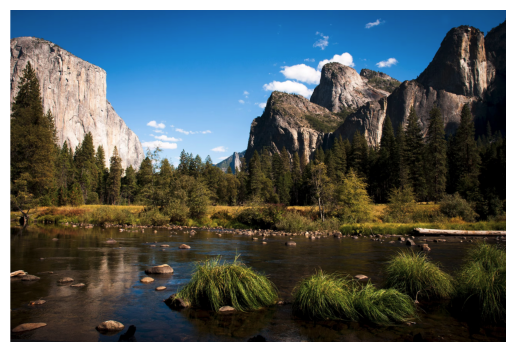

In [8]:
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import Image

img_url = "https://huggingface.co/datasets/patrickvonplaten/random_img/resolve/main/yosemite.png"

response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image_url", "image_url": {"url": img_url}},
            {"type": "text", "text": "Describe this image in two sentences."},
        ]
    },
]

completion = client.chat.completions.create(
  model="meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8",
  messages=messages,
)

print(completion.choices[0].message.content)

The image depicts a serene landscape featuring a river flowing through a valley surrounded by towering mountains and lush vegetation. The scene is characterized by the tranquil river, with rocks and grasses visible above the water's surface, and is flanked by dense forests and majestic granite cliffs under a clear blue sky.


### Multimodal: Understanding Multiple Images

Llama 4 Maverick is designed for multimodal tasks, particularly image understanding. It can analyze images provided alongside text prompts. Note that currently, the image understanding capability primarily works with English prompts.

First, we'll display the images within the notebook.

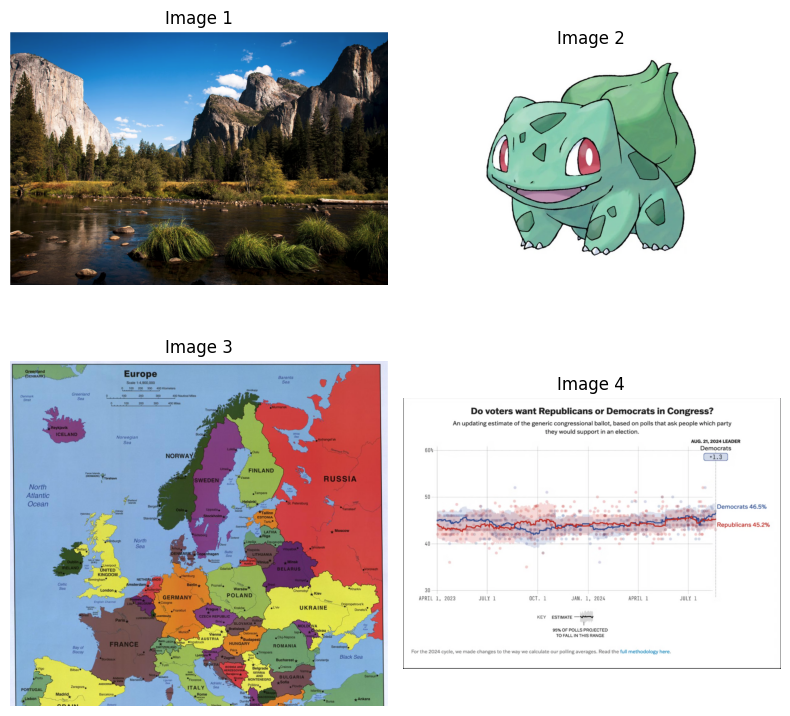

In [10]:
images = ["https://huggingface.co/datasets/patrickvonplaten/random_img/resolve/main/yosemite.png",
          "https://huggingface.co/datasets/patrickvonplaten/random_img/resolve/main/ezgif-6ac23342a6d837.jpg",
          "https://huggingface.co/datasets/patrickvonplaten/random_img/resolve/main/europe.png",
          "https://huggingface.co/datasets/patrickvonplaten/random_img/resolve/main/polls.png"
          ]

# Display images in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

for i, img_url in enumerate(images):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()



In [11]:
# Multi-modal message with multiple images
response = client.chat.completions.create(
    model="meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8",
    messages=[{
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Look at these photos in my camera roll. Give me a very short description of each photo."
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": images[0]
                }
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": images[1]
                }
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": images[2]
                }
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": images[3]
                }
            }
        ]
    }]
)
print(response.choices[0].message.content)

1. A serene landscape of Yosemite National Park with a river and mountains.
2. A cartoon image of the Pokémon character Bulbasaur.
3. A map of Europe showing different countries.
4. A graph showing the polling data for the US congressional election.


### Structured Decoding with Image Understanding

JSON Mode(structured decoding) now works natively with images, i.e. the model can understand the images and return the appropriate json schema. In this example, we ask Llama to extract out structured information from an image.

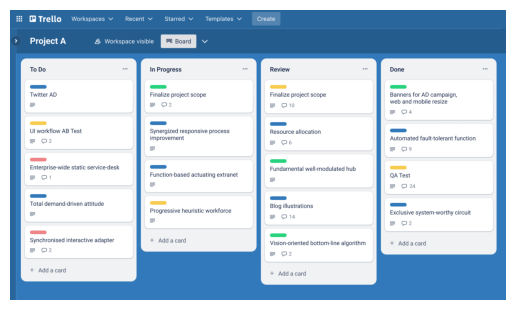

In [12]:
img_url = "https://napkinsdev.s3.us-east-1.amazonaws.com/next-s3-uploads/d96a3145-472d-423a-8b79-bca3ad7978dd/trello-board.png"

response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
from pydantic import BaseModel, Field
import json

# Define the schema for the output
class ImageDescription(BaseModel):
    project_name: str = Field(description="The name of the project shown in the image")
    col_num: int = Field(description="The number of columns in the board")


    # Call the LLM with the JSON schema
extract = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": "Extract a JSON object from the image."},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": img_url,
                        },
                    },
                ],
            },
        ],
        model="meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8",
        response_format={
            "type": "json_object",
            "schema": ImageDescription.model_json_schema(),
        },
    )

output = json.loads(extract.choices[0].message.content)
print(json.dumps(output, indent=2))

{
  "project_name": "Project A",
  "col_num": 4
}


To learn more about Llama4 read our Quickstart [docs here](https://docs.together.ai/docs/llama4-quickstart).